# Prediction of Sales
  - Author: Loveida Lucero

## Project Overview

## Load and Inspect Data

### Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loaded Data

In [ ]:
fname = '/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fname)

In [ ]:
# View first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# View summary info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning


Rows/Colums:

In [ ]:
df_sales.shape

(8523, 12)

Datatypes of each variable:

In [ ]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Duplicates

Checking for duplicated data:

In [ ]:
df_sales.duplicated().sum()

0

- No duplicates found.

### Missing Values

Identify missing values:

In [ ]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Item_Weight has 1463 missing values.
- Outlet_Size has 2410 missing values.

Percentages of missing values:

In [ ]:
df_sales.isna().sum()/len(df_sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Address the missing values using a placeholder value:

In [ ]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(value = -1)
df_sales['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(value = 'MISSING')
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Confirm missing values were replaced:

In [ ]:
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Inconsistencies

Create filters to identify all values per object type:

In [ ]:
data_types = df_sales.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for col in str_cols:
    print(f'- {col}:')
    print(df_sales[col].value_counts(dropna=False))
    print("\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926


- There are inconsistnecies with the spelling of the following categories in Item_Fat_Content.
  - **LF** should be **Low Fat**
  - **reg** should be **Regular**
  - **low fat** should be **Low Fat**


Fix all inconsistent categories:

In [ ]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

Confirm category inconsistencies were addressed:

In [ ]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary statistics of each (min, max, mean)for numerical columns:

In [ ]:
stats = df_sales.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Clean Data

In [ ]:
df_sales.dtypes
df_sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,-1.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,MISSING,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,MISSING,Tier 2,Supermarket Type1,4710.5350


## Exploratory Data Analasis

###Histogram to view distribution of numerical features:

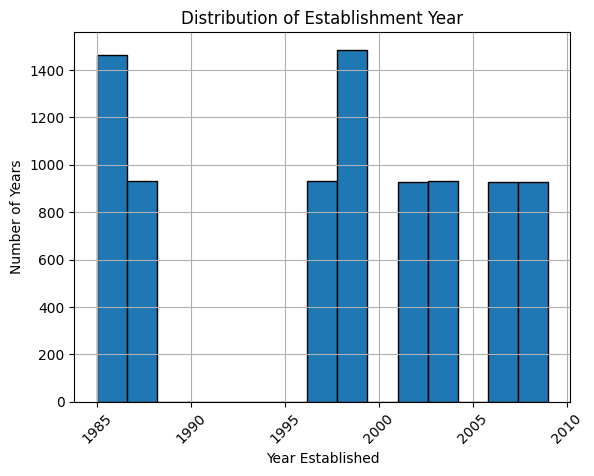

In [ ]:
# graph Outlet_Establishment_Year
ax = df_sales['Outlet_Establishment_Year'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')

# set labels
ax.set_title('Distribution of Establishment Year')
ax.set_xlabel('Year Established')
ax.set_ylabel('Number of Years');

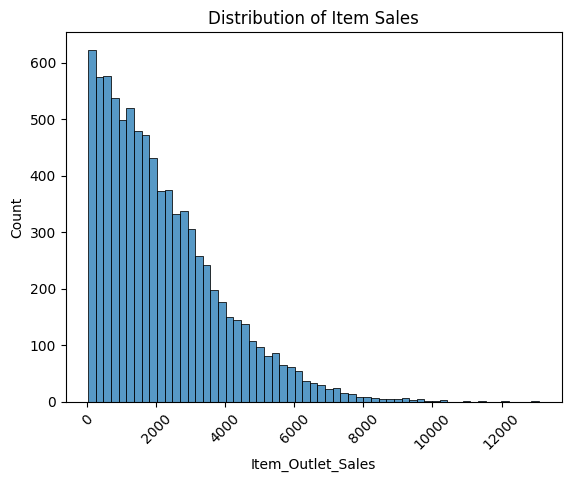

In [ ]:
# graph Item_Outlet_Sales
ax = sns.histplot(data=df_sales,
                  x='Item_Outlet_Sales')

#Custumize
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Distribution of Item Sales');

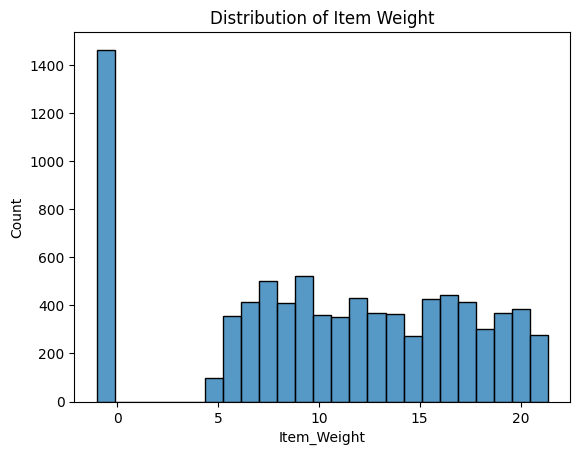

In [ ]:
# graph Item_Weight
ax = sns.histplot(data=df_sales,
                  x='Item_Weight')

#Custumize
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x');
ax.set_title('Distribution of Item Weight');

###Boxplots to view statistical data of numerical features:

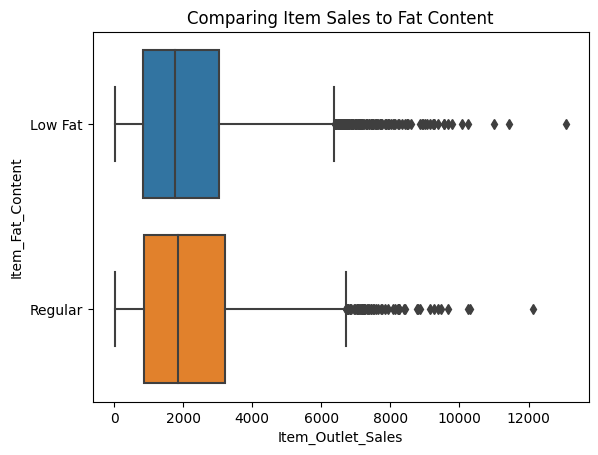

In [ ]:
#graph item fat contentand item outlet sales
ax = sns.boxplot(data=df_sales, y='Item_Fat_Content', x="Item_Outlet_Sales")

# set title
ax.set_title("Comparing Item Sales to Fat Content");

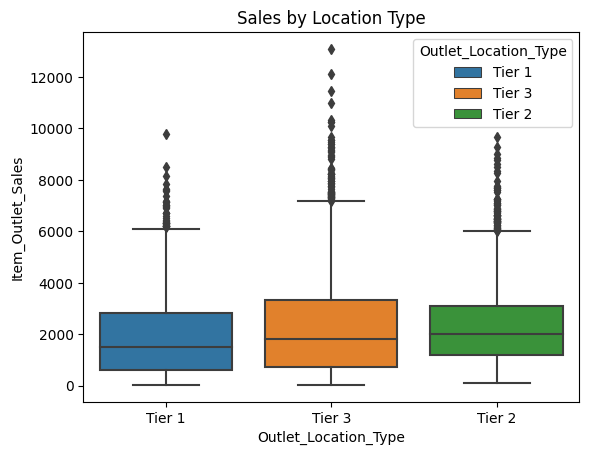

In [ ]:
# graph outlet sales and outlet location type
ax = sns.boxplot(data=df_sales, x='Outlet_Location_Type',
                y='Item_Outlet_Sales',
                hue='Outlet_Location_Type',
                dodge=False)

# set title
ax.set_title('Sales by Location Type');


###Countplots to view frequency of each class of categorical features:

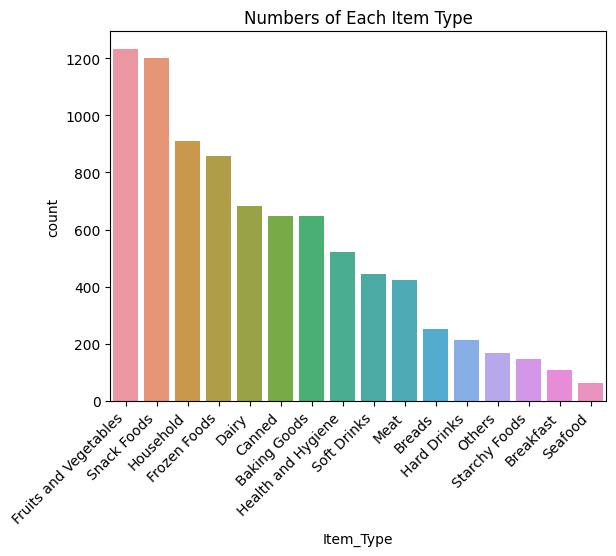

In [ ]:
#set value caounts for Item Type
val_counts = df_sales['Item_Type'].value_counts()

#graph Item type
ax = sns.countplot(data=df_sales, x="Item_Type",
                   order=val_counts.index)
#customize
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Numbers of Each Item Type');

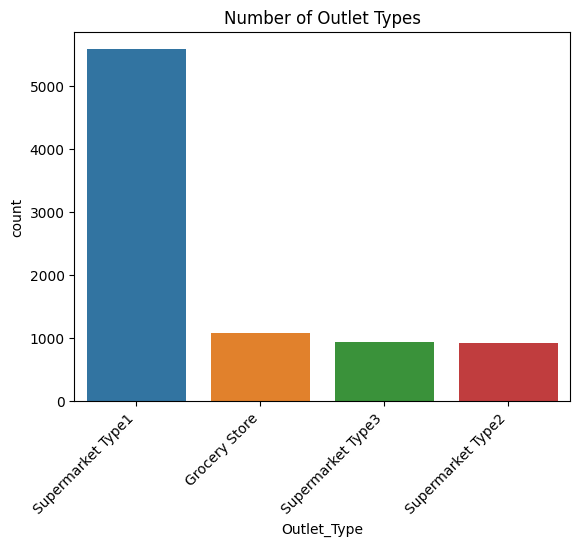

In [63]:
#set value counts for Outlet Type
tp_val_counts = df_sales['Outlet_Type'].value_counts()

#graph Outlet type
ax = sns.countplot(data=df_sales, x="Outlet_Type",
                   order=tp_val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Outlet Types');

###Heatmaps to view correlatinos between features:

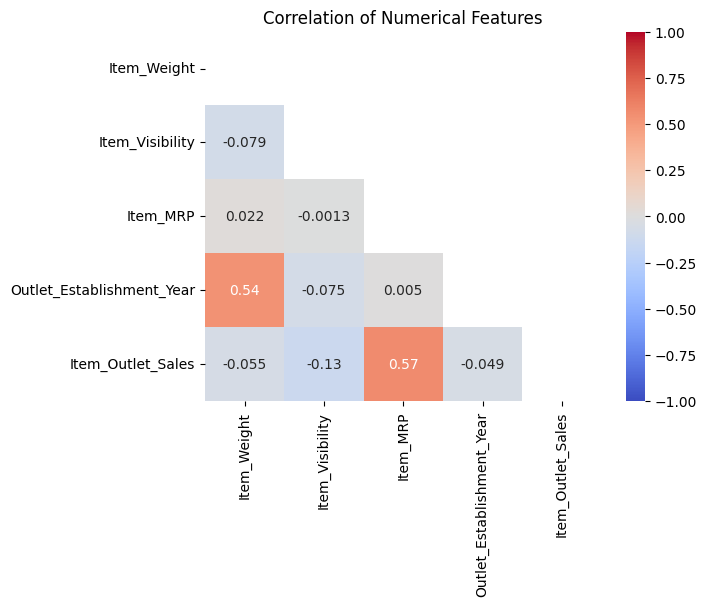

In [ ]:
#set corr for item visibility and sales
corr = df_sales.corr(numeric_only = True)

#block upper triangle(mirror)image
mask = np.triu(np.ones_like(corr))

#graph features
ax = sns.heatmap(corr,
                 annot=True,
                 cmap='coolwarm',
                 vmin=-1,
                 vmax=1,
                 mask=mask)

# set label
ax.set_title('Correlation of Numerical Features');

## Feature Inspection